<a href="https://colab.research.google.com/github/SandhyaKshirsagar/ML-Practice-Projects/blob/main/Naive_Bayes_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Project

Classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install nltk

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Naive Bayes/yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [ ]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [ ]:
def count_words(text):
  return len(text.split())

data['text_length'] = data['text'].apply(count_words)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


# EDA

Let's explore the data


**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

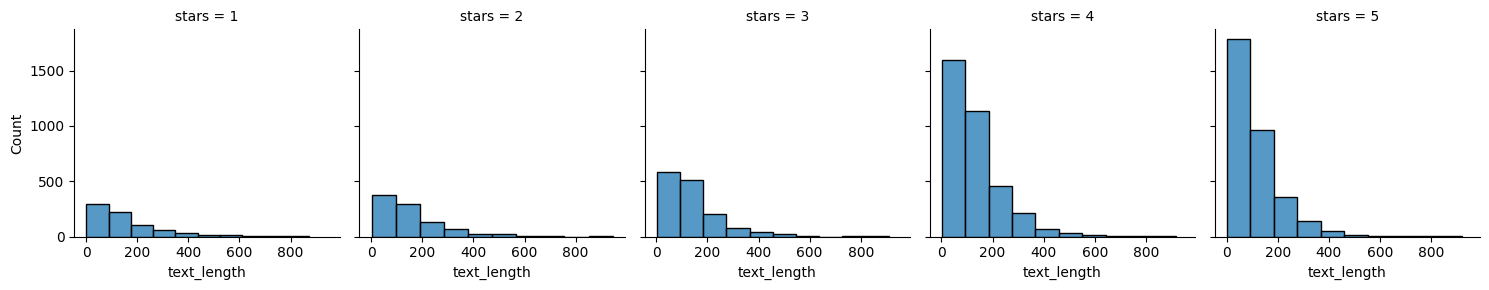

In [ ]:
g = sns.FacetGrid(data, col="stars")
g.map_dataframe(sns.histplot, x="text_length", bins=10)

**Create a boxplot of text length for each star category.**

<Axes: xlabel='stars', ylabel='text_length'>

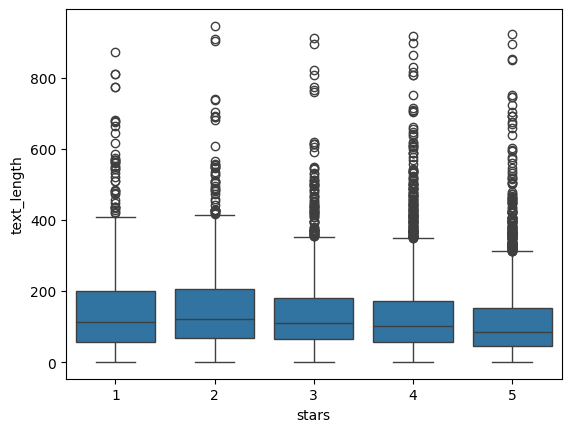

In [ ]:
sns.boxplot(data = data, x='stars', y='text_length')

**Create a countplot of the number of occurrences for each type of star rating.**

In [ ]:
count_of_stars = data['stars'].value_counts()
count_of_stars

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<Axes: xlabel='None'>

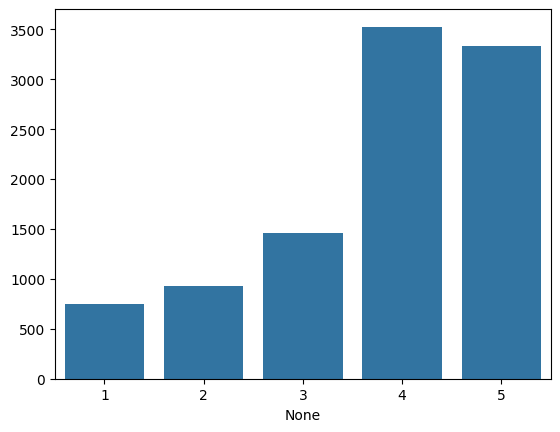

In [ ]:
sns.barplot(x=count_of_stars.index, y=count_of_stars.values)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [ ]:
mean_of_num_cols = pd.DataFrame(data.groupby('stars')['cool','useful','funny','text_length'].mean())
mean_of_num_cols

<ipython-input-13-1ace50d19c93>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_of_num_cols = pd.DataFrame(data.groupby('stars')['cool','useful','funny','text_length'].mean())


,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [ ]:
mean_of_num_cols.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text_length,-0.865362,0.697506,0.847204,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: >

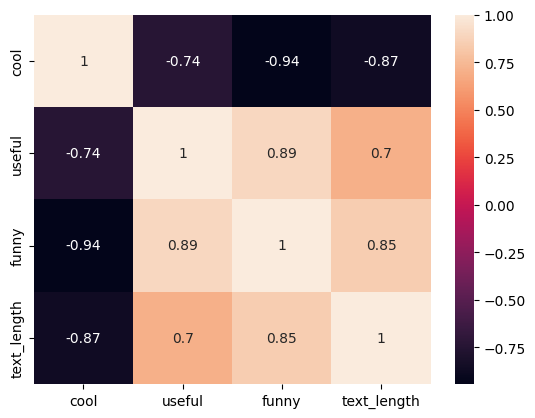

In [ ]:
sns.heatmap(mean_of_num_cols.corr(),annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [ ]:
yelp_class = pd.DataFrame(data.loc[data['stars'].isin([1,5])])
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,292


In [ ]:
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [ ]:
X = yelp_class['text']
y = yelp_class['stars']

In [ ]:
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [ ]:
y.head()

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64

**Import CountVectorizer and create a CountVectorizer object.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_obj = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [ ]:
X = vectorizer_obj.fit_transform(X)

In [ ]:
X.shape

(4086, 19183)

In [ ]:
X[1, :].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2860, 19183)
(1226, 19183)
(2860,)
(1226,)


## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

**Now fit nb using the training data.**

In [ ]:
mnb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [ ]:
y_pred = mnb.predict(X_test)
y_pred

array([5, 1, 5, ..., 5, 5, 5])

** Create a confusion matrix and classification report using these predictions and y_test **

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9257748776508973

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[159,  69],
       [ 22, 976]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [ ]:
y_pred_proba = mnb.predict_proba(X_test)
print(y_pred_proba)

[[1.52022859e-14 1.00000000e+00]
 [9.99999999e-01 5.24516203e-10]
 [1.47720653e-14 1.00000000e+00]
 ...
 [3.36564302e-16 1.00000000e+00]
 [4.09987139e-08 9.99999959e-01]
 [3.30074463e-10 1.00000000e+00]]


In [ ]:
y_pred_proba[:,1]

array([1.00000000e+00, 5.24516203e-10, 1.00000000e+00, ...,
       1.00000000e+00, 9.99999959e-01, 1.00000000e+00])

In [ ]:
y_test

2414    5
3552    1
5364    5
1222    5
5011    1
       ..
5627    5
862     5
5307    5
9420    5
1455    5
Name: stars, Length: 1226, dtype: int64

In [ ]:
#pos_label is specifying number of class labels. Here we have 5 classes, starts 1, 2, 3, 4 ,5. Highest class label should be mentioned
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1],pos_label=5)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
print(roc_auc)

0.9601351826459938


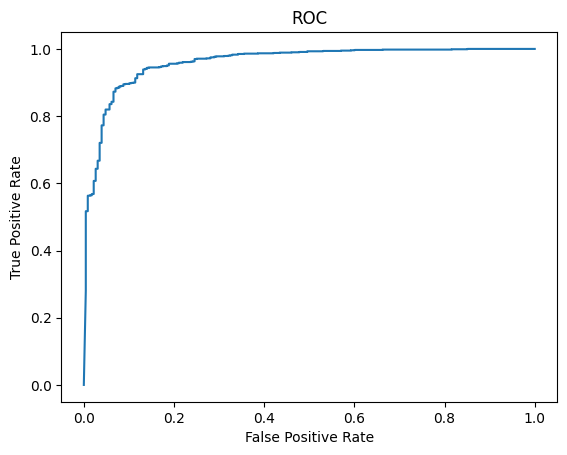

In [ ]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer


** Import Pipeline from sklearn. **

In [ ]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [ ]:
pipeline = Pipeline(steps=[('vectorizer_obj', CountVectorizer()),('tfidf', TfidfTransformer()),('mnb', MultinomialNB())])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [ ]:
X_pl = yelp_class['text']
y_pl = yelp_class['stars']
X_pl_train, X_pl_test, y_pl_train, y_pl_test = train_test_split(X_pl, y_pl)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [ ]:
pipeline.fit(X_pl_train,y_pl_train)

Pipeline(steps=[('vectorizer_obj', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('mnb', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [ ]:
y_pl_pred = pipeline.predict(X_pl_test)

In [ ]:
print(metrics.confusion_matrix(y_pl_test, y_pl_pred))

[[  1 182]
 [  0 839]]


In [ ]:
print(metrics.classification_report(y_pl_test, y_pl_pred))

              precision    recall  f1-score   support

           1       1.00      0.01      0.01       183
           5       0.82      1.00      0.90       839

    accuracy                           0.82      1022
   macro avg       0.91      0.50      0.46      1022
weighted avg       0.85      0.82      0.74      1022



Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!